In [3]:
!PIP install folium
!PIP install geopandas
!PIP install plotly


In [4]:
#Task 2: Choropleth map

import geopandas as gpd

data = gpd.read_file(r"C:\Users\Msimisi Dlamini\Desktop\GitKraken\python-mapfactory\country_boundaries_v2.json")
data.head(5)

,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,REGION_WB,LABEL_X,LABEL_Y,geometry
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,34.959183,-6.051866,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1..."
2,Western Sahara,Indeterminate,Western Sahara,W. Sahara,Western Sahara,Sahrawi Arab Democratic Republic,603253.0,11,7. Least developed region,5. Low income,Africa,Northern Africa,Middle East & North Africa,-12.630304,23.967592,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27..."
3,Canada,Sovereign country,Canada,Canada,Canada,Canada,37589262.0,15,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-101.910700,60.324287,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,Country,United States of America,United States of America,United States,United States of America,328239523.0,17,1. Developed region: G7,1. High income: OECD,North America,Northern America,North America,-97.482602,39.538479,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
#making a choropleth map with classes

data["Population"] = (data["POP_EST"]/1000000).astype(float)

data.head(3)



,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,REGION_WB,LABEL_X,LABEL_Y,geometry,Population
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.889953
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,34.959183,-6.051866,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1...",58.005463
2,Western Sahara,Indeterminate,Western Sahara,W. Sahara,Western Sahara,Sahrawi Arab Democratic Republic,603253.0,11,7. Least developed region,5. Low income,Africa,Northern Africa,Middle East & North Africa,-12.630304,23.967592,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27...",0.603253


In [29]:
#define function
def Population(pop):
 if pop["Population"]>=0 and pop.Population <150:
    return "low" 
 elif pop["Population"]>=150 and pop.Population <300:
    return "moderate"
 elif pop["Population"]>=300:
    return "high"
 

In [30]:
data["Population Rating"] = data.apply(lambda pop:Population(pop), axis = 1)
data.head(3)

,SOVEREIGNT,TYPE,ADMIN,NAME,NAME_LONG,FORMAL_EN,POP_EST,POP_RANK,ECONOMY,INCOME_GRP,CONTINENT,SUBREGION,REGION_WB,LABEL_X,LABEL_Y,geometry,Population,Population Rating
0,Fiji,Sovereign country,Fiji,Fiji,Fiji,Republic of Fiji,889953.0,11,6. Developing region,4. Lower middle income,Oceania,Melanesia,East Asia & Pacific,177.975427,-17.826099,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.889953,low
1,United Republic of Tanzania,Sovereign country,United Republic of Tanzania,Tanzania,Tanzania,United Republic of Tanzania,58005463.0,16,7. Least developed region,5. Low income,Africa,Eastern Africa,Sub-Saharan Africa,34.959183,-6.051866,"MULTIPOLYGON (((33.90371 -0.95000, 34.07262 -1...",58.005463,low
2,Western Sahara,Indeterminate,Western Sahara,W. Sahara,Western Sahara,Sahrawi Arab Democratic Republic,603253.0,11,7. Least developed region,5. Low income,Africa,Northern Africa,Middle East & North Africa,-12.630304,23.967592,"MULTIPOLYGON (((-8.66559 27.65643, -8.66512 27...",0.603253,low


Text(0.5, 1.0, 'Population per country')

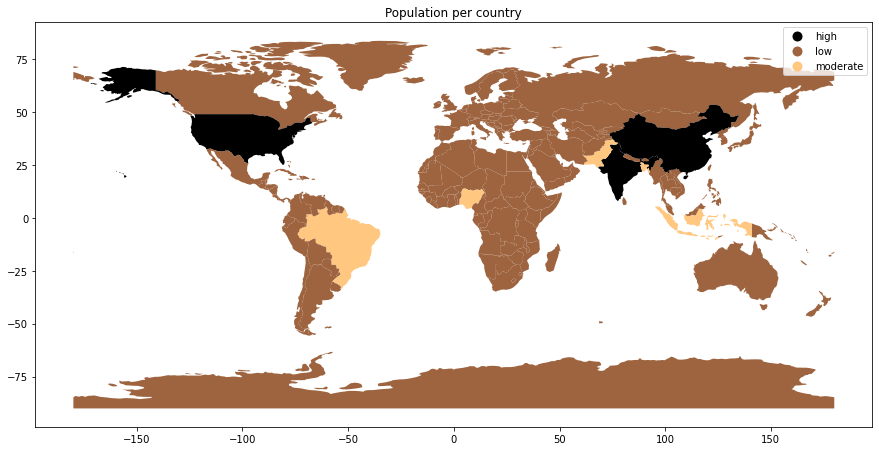

In [31]:
#final output choropleth map

m = data.plot(column = "Population Rating", figsize=(15, 10), legend = True, cmap = "copper" )
m.set_title("Population per country")
